# Combined Recent Surveys
This notebook make predictions for the combined features and cross border predictions.

In [1]:
cd ..

/home/sallinen/Programmation/predicting-poverty-through-time/src


In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from lib import estimator_util as eu
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [9]:
sns.set_theme()

In [10]:
complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/resnet_trans_all_countries_hyper.csv", "../data/")

## Heatmap for cross country

In [11]:
def run_combined(df, osm_cols, model, **params) :
    countries = [["NG"], ["ETH"] ,["TZA"], ["MW"], ["NG", "ETH", "TZA", "MW"]]
    results = np.zeros((5,5))
    for i, country in enumerate(countries):
        X, y = eu.get_recent_features(df, country, osm_cols)
        for j, out_country in enumerate(countries):
            X_out, y_out = eu.get_recent_features(df, out_country, osm_cols)
            r, _, m = eu.run_model_out(X, y, X_out, y_out, model, **params)
            results[i,j] = r
    return results

In [13]:
def heatmap(data):
    countries = ["Nigeria", "Ethiopia" ,"Tanzania", "Malawi", "Pooled"]
    df_cm = pd.DataFrame(data, index = countries, columns = countries)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, cbar_kws={'label': r'$r^2$'})
    plt.xlabel("Country trained on")
    plt.ylabel("Country evaluated on")
    ax = plt.gca()
    plt.text(-0.1, 1.1, string.ascii_uppercase[0], size=20, weight='bold', transform=ax.transAxes)
    plt.savefig("../figs/cross_country_pooled.pdf", dpi=600, bbox_inches="tight")

### Using Ridge Regression to compare with the original model

In [14]:
ridge_results = run_combined(complete_df, all_cols, Ridge, alpha = 1000)

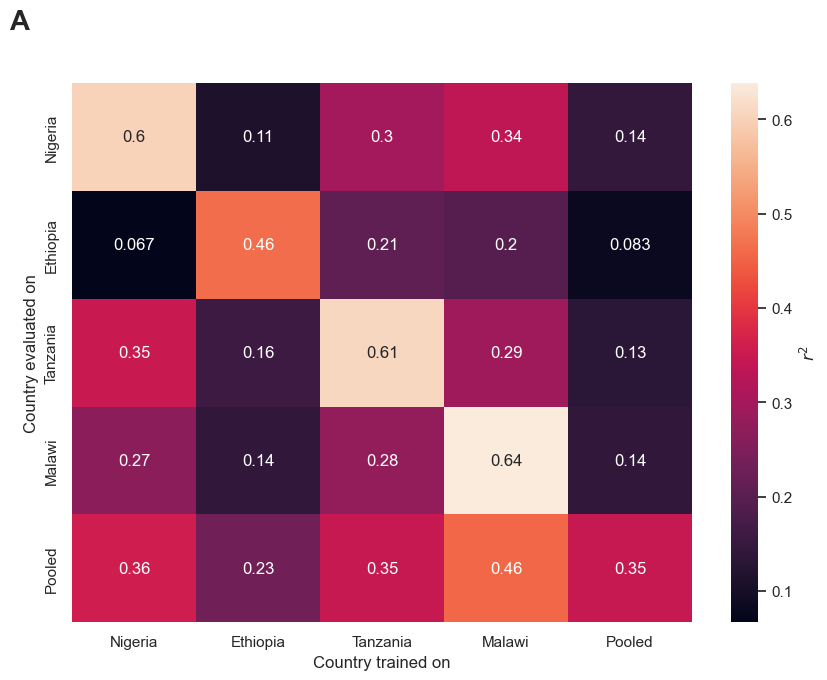

In [15]:
heatmap(ridge_results)

### Using CatBoost our best model

In [ ]:
catboost_results = run_combined(complete_df, all_cols, CatBoostRegressor)

In [ ]:
heatmap(catboost_results)

## Pooled Dataset

In [19]:
def plot_pooled_results(df, osm_cols, model, **params) :
    X, y = eu.get_recent_features(df, ["NG", "ETH", "TZA", "MW"], osm_cols, scale_cnn=False)
    r2, y_real, y_predicted, model = eu.run_model(X, y, model, **params)
    fig = eu.plot_predictions(y_real, y_predicted, r2, "Pooled", "max in Dataset", 1)
    return fig

### with Ridge

In [20]:
fig = plot_pooled_results(complete_df, all_cols, Ridge, alpha = 1000)
fig.savefig("../figs/pooled_max_year_ridge.pdf", dpi=600, bbox_inches="tight")

TypeError: '<' not supported between instances of 'list' and 'int'

### with CatBoost

In [ ]:
X, y = eu.get_recent_features(complete_df, ["NG", "ETH", "TZA", "MW"], all_cols, scale_cnn=False)
r2, y_hest, model = eu.run_model(X, y, CatBoostRegressor)
fig = eu.plot_predictions(y, y_hest,r2, "Pooled", "max in Dataset", 1, x_label=True)
plt.savefig("../figs/pooled_max_year_catboost.pdf", dpi=600, bbox_inches="tight")